# Installations!

In [ ]:
!pip install mecab-python3

In [ ]:
#These wheels include a copy of the MeCab library, but not a dictionary. 
#In order to use MeCab you'll need to install a dictionary. unidic-lite is a good one to start with:
!pip install unidic-lite

In [ ]:
# normalization tool
!pip install neologdn

In [ ]:
!pip install openpyxl

In [ ]:
# To be able to see Japanese!
!pip install japanize_matplotlib

# Libraries

In [1]:
import os
import pandas as pd

# Preprocessing
import MeCab
import neologdn
import collections
from nltk import FreqDist
from nltk.corpus import stopwords

# Visualization
import matplotlib.pyplot as plt
import japanize_matplotlib
#import seaborn as sns # REMINDER: make sure to remove if not using!

# Just having fun

In [ ]:
path = "/root/code/mochiyam/simply-japanese/data/2_RawData"
df = pd.read_excel(os.path.join(path, 'SNOW_T15_150.xlsx'))
df.head()

In [ ]:
df.drop(columns=['#英語(原文)'], inplace=True)
df.head()

In [ ]:
df.rename(columns={"#日本語(原文)": "original", "#やさしい日本語": "simplified"}, inplace=True)
df.head()

In [ ]:
tagger = MeCab.Tagger()
text = df['original'][0]
parsed = tagger.parse(text)
print(parsed)

名詞 - noun
助詞 - particle
連体詞 - 
動詞
補助記号

In [ ]:
# Just testing stuff out
test = MeCab.Tagger("-O wakati") 
text = neologdn.normalize(text, repeat=2)
parsed = test.parse(text)
print(parsed.split())

In [ ]:
!pip show unidic-lite

In [ ]:
test = MeCab.Tagger("r'-d /root/.pyenv/versions/3.8.12/envs/simply-japanese/lib/python3.8/site-packages'")
text = neologdn.normalize(text, repeat=2)
parsed = test.parse(text)
print(parsed)

In [ ]:
# Super dumb dumb method
def count_all_word_frequency():
    all_words = collections.Counter()
    t = MeCab.Tagger()
    for idx, row in df.iterrows():
        text = row['original']
        node = t.parseToNode(text)
        while node:
            all_words[node.surface] += 1
            node = node.next
    return all_words
all_words = count_all_word_frequency()
# tuples in a list
print(all_words.most_common(25))

In [ ]:
!pip install nltk

In [23]:
def plot_word_frequency(word_freq, most_common_num):
    freq_dist = FreqDist(word_freq)
    freq_dist.plot(most_common_num,cumulative=False)
#plot_word_frequency(all_words, 25)

In [ ]:
# Super dumb dumb method
def count_all_word_frequency():
    all_words = collections.Counter()
    t = MeCab.Tagger()
    for idx, row in df.iterrows():
        text = row['original']
        node = t.parseToNode(text)
        while node:
            all_words[node.surface] += 1
            node = node.next
    return all_words
all_words = count_all_word_frequency()
# tuples in a list
print(all_words.most_common(25))

In [ ]:
test = MeCab.Tagger("-O wakati")
print(text)
text = "あなたは何を見つめているのですか。"
parsed = test.parse(text)
node = test.parseToNode(text).next
while node.next:
    print(node.surface, node.feature.split(',')[0])
    node = node.next
#node.surface.decode("utf-8", "ignore")


In [ ]:
#               助詞           
#              /
# Remove 付属語 
#　　　　　　　 \
#             　 助動詞

#月 が｜きれいな｜晩 でし た 。
#付属語 : が　・　でした

# With 10_000 Data!


In [18]:
path = "/root/code/mochiyam/simply-japanese/data/2_RawData"
df = pd.read_excel(os.path.join(path, 'SNOW_T15_10000.xlsx'))
df.head()

,#日本語(原文),#やさしい日本語,#英語(原文)
0,父は私が外国へ行くことを承知した。,父は私が外国へ行くことを許した。,my father consented to my going abroad .
1,卑屈な奴。,自分のことをダメだと考える人。,don 't be a dog .
2,それは本当のはずはない。,それは本当のはずはない。,it cannot be true .
3,車がそんなに混んでなければ問題ないでしょう。,車がそんなに混んでなければ問題ないでしょう。,we shouldn 't have any trouble if the traffic ...
4,２時間も待たされた。,２時間も待った。,i was kept waiting for as long as two hours .


In [19]:
df.drop(columns=['#英語(原文)'], inplace=True)
df.rename(columns={"#日本語(原文)": "original", "#やさしい日本語": "simplified"}, inplace=True)
df.head()

,original,simplified
0,父は私が外国へ行くことを承知した。,父は私が外国へ行くことを許した。
1,卑屈な奴。,自分のことをダメだと考える人。
2,それは本当のはずはない。,それは本当のはずはない。
3,車がそんなに混んでなければ問題ないでしょう。,車がそんなに混んでなければ問題ないでしょう。
4,２時間も待たされた。,２時間も待った。


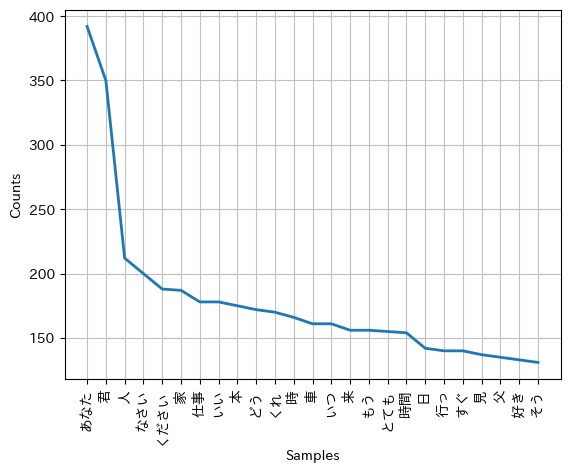

In [24]:
# Counts all the independent word 自立語
_stopwords = stopwords.words('japanese')

def count_all_words(docs, col='original'):
    all_words = collections.Counter()
    t = MeCab.Tagger("-O wakati")
    for idx, row in docs.iterrows():
        text = row[col]
        node = t.parseToNode(text).next
        while node.next:
            part_of_speech = node.feature.split(',')[0]
            # REPLACE_WORD_POS = ("名詞", "動詞", "形容詞", "副詞", "未知語") # TBD
            # IGNORE = ("接尾", "非自立", "代名詞")    
            if part_of_speech in ["助動詞", "助詞", "補助記号"] or node.surface in _stopwords:
                node = node.next
                continue
            all_words[node.surface] += 1
            node = node.next
    return all_words
ind_word_freq = count_all_words(df)
plot_word_frequency(ind_word_freq, 25)

In [21]:
top_2000_word_freq = ind_word_freq.most_common(2000)
top_2000_word_freq[-25:]

[('暑く', 2),
 ('けっして', 2),
 ('受かっ', 2),
 ('睡眠', 2),
 ('おもしろく', 2),
 ('失業', 2),
 ('青ざめ', 2),
 ('打っ', 2),
 ('白', 2),
 ('奈良', 2),
 ('消さ', 2),
 ('野菜', 2),
 ('運ぶ', 2),
 ('止める', 2),
 ('損なっ', 2),
 ('カ国', 2),
 ('至急', 2),
 ('予報', 2),
 ('式', 2),
 ('捨て', 2),
 ('物事', 2),
 ('メニュー', 2),
 ('上げ', 2),
 ('認める', 2),
 ('命じ', 2)]

In [ ]:
# 1. Find sentences that are exactly the same 
# 2. temp_list of tokens for sentence original and simplified
# 3. Compare the two temp_list
# 4. two global_lists of deleted and added(simplified)

In [ ]:
# temp = df.head(10)
# temp

In [27]:
# Step 1.  Get the corpuses that are different from original and simplified 
diff_corpus_df = df[df['original'] != df['simplified']]
diff_corpus_df

,original,simplified
0,父は私が外国へ行くことを承知した。,父は私が外国へ行くことを許した。
1,卑屈な奴。,自分のことをダメだと考える人。
4,２時間も待たされた。,２時間も待った。
6,彼はいつも父親の陰口を言います。,彼はいつも父のいないところで悪いことを言います。
7,彼女はもう少しで遅刻するところだった。,彼女はもう少しで遅れるところだった。
...,...,...
9993,わたしは犬と猫を飼っています。,私は犬と猫と一緒に住んでいます。
9994,何と平山先生は良い先生でしょう。,何と平山先生はいい先生でしょう。
9995,彼女は服にたくさん金を使う。,彼女は服に多くの金を使う。
9996,彼は長年、腰痛で困っている。,彼は長い間、腰が痛くて困っている。


In [28]:
# 2. Create a temp_list of tokens for sentence original and simplified
original_temp_list = count_all_words(diff_corpus_df, 'original')
simplified_temp_list = count_all_words(diff_corpus_df, 'simplified')

In [ ]:
# simplified_temp_list

In [ ]:
# original_temp_list

In [ ]:
# pd.DataFrame(dict(original_temp_list).items(), columns=['word', 'count'])

In [33]:
# 3. Compare the two temp_list

# Collections library
# Elements are subtracted from an iterable or from another mapping (or counter). 
# Like dict.update() but subtracts counts instead of replacing them. Both inputs and outputs may be zero or negative.
diff_temp_df = simplified_temp_list
diff_temp_df.subtract(original_temp_list)

In [30]:
diff_temp_df[diff_temp_df['count'] < 0].sort_values(by='count').head(10)

AttributeError: 'int' object has no attribute 'sort_values'

In [34]:
# 4. two global_lists of deleted and added(simplified)
deleted = []
added = []

diff_temp_df = pd.DataFrame(dict(diff_temp).items(), columns=['word', 'count'])
deleted =  diff_temp_df[diff_temp_df['count'] < 0]['word'].tolist()
added = diff_temp_df[diff_temp_df['count'] >= 0]['word'].tolist()

In [ ]:
# added

In [35]:
len(deleted), len(added)

(3988, 723)

In [80]:
path = "/root/code/mochiyam/simply-japanese/data/2_RawData"
df = pd.read_excel(os.path.join(path, 'SNOW_T15_10000.xlsx'))
df.drop(columns=['#英語(原文)'], inplace=True)
df.rename(columns={"#日本語(原文)": "original", "#やさしい日本語": "simplified"}, inplace=True)

In [80]:
df.iloc[47]

original      実を言うと彼女はぼくの妹なんだ。
simplified     実を言うと彼女は僕の妹なんだ。
Name: 47, dtype: object

# Exploring DNN

In [5]:
DATA_LENGTH = len(df)
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = DATA_LENGTH
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = DATA_LENGTH
EMBEDDING_SIZE = 0

In [6]:
#Seq2Seq : Encoder LSTM -Decoder LSTM architecture

original_sentence = df['original'].to_list()
sos_simplified_sentence = [f'<sos> {sentence}' for sentence in df['simplified'].to_list()]
eof_simplified_sentence = df['simplified'].str.cat(['<eof>' for _ in range(DATA_LENGTH)], sep =' ').to_list()

In [7]:
! pip freeze | grep gensim

gensim==4.3.0


In [8]:
from gensim.models import word2vec

In [10]:
# please work
model = word2vec.Word2Vec.load('word2vec.gensim.model')

In [12]:
model.wv['なまえ']

array([ 0.01991528, -0.16895553, -0.0005631 , -0.07544424, -0.2785315 ,
        0.24721201, -0.06918625,  0.10299557,  0.00116522,  0.06181549,
       -0.01447577,  0.18434595,  0.08120248,  0.04302993, -0.0846712 ,
        0.24196617,  0.1394672 ,  0.10917841, -0.10591616,  0.11584023,
        0.26747116, -0.19388063, -0.10076082,  0.04102563,  0.07777748,
       -0.00689773, -0.03633595,  0.17408828,  0.25311628, -0.00657137,
        0.03750438,  0.06932919,  0.07102618,  0.1766966 , -0.19402435,
       -0.01134124,  0.10243213,  0.04215263,  0.15948357, -0.28511557,
        0.16012833,  0.23132074,  0.00515708, -0.300643  ,  0.13948335,
        0.04682528, -0.11366569,  0.12245803,  0.03999065, -0.01773298],
      dtype=float32)

In [84]:
model.wv.most_similar('ただいま', topn=30)

[('本日', 0.8413307666778564),
 ('おやすみ', 0.8351115584373474),
 ('おはよう', 0.8254367709159851),
 ('こんばんは', 0.8170187473297119),
 ('今宵', 0.8105134963989258),
 ('今夜', 0.8101720809936523),
 ('こんにちは', 0.8042770624160767),
 ('さぁ', 0.8013049364089966),
 ('バンザイ', 0.8006255030632019),
 ('どうぞ', 0.7986030578613281),
 ('あす', 0.7947324514389038),
 ('あした', 0.794703483581543),
 ('日和', 0.7937016487121582),
 ('!」（', 0.7929791212081909),
 ('ホンマ', 0.7927483320236206),
 ('ありがとう', 0.7914125323295593),
 ('!!」（', 0.7903262376785278),
 ('ただ今', 0.7882071137428284),
 ('あなたと', 0.7827165126800537),
 ('おーい', 0.7818276286125183),
 ('ごめんなさい', 0.7817065119743347),
 ('さあ', 0.7797262072563171),
 ('お正月', 0.7786166667938232),
 ('さようなら', 0.777560830116272),
 ('!!～', 0.7756630182266235),
 ('がんばり', 0.7747898101806641),
 ('ほっと', 0.7743570804595947),
 ('歩こう', 0.7720304131507874),
 ('早起き', 0.770897388458252),
 ('!」、', 0.770250141620636)]

In [89]:
v1 = model.wv['ただいま']
v2 = model.wv['本日']
res = v1 - v2
model.wv.similarity('いま', '今')

0.6688409

In [66]:
list[:10]

['父', '外国', '行く', '許し', '自分', 'ダメ', '考える', '人', '２', '時間']

In [63]:
list = diff_temp_df['word'].to_list()
w2v = word2vec.Word2Vec(list, vector_size=10,
                        window=5,
                        min_count=5)

In [71]:
# w2v.wv.key_to_index

In [ ]:
"""
1. Which POS word to replace
2. Use the pre-trained Word2Vec model to get closest distance
3. Out of the 2000 word list which word has the closest distance



4. Compare 3. and 4. The closest one gets subs

"""

"""
PSEUDO CODE

x = minimum similarity
for sentence in data:
    for word in sentence:
        if word.pos in poslist:
            if word in list2000:
                continue
            else:
                for term2000 in list2000:
                    list = []
                    list.append(wv.similarity(word, term2000))
                replace word with max(list) if max(list) > x
        else: continue

"""

In [81]:
#代名詞、名詞、動詞

test = MeCab.Tagger()
text = "ただいま話し中です。"
parsed = test.parse(text)
node = test.parseToNode(text).next
while node.next:
    print(node.surface, node.feature)
    node = node.next
#node.surface.decode("utf-8", "ignore")

ただいま 名詞,普通名詞,副詞可能,*,*,*,タダイマ,只今,ただいま,タダイマ,ただいま,タダイマ,和,*,*,*,*,タダイマ,タダイマ,タダイマ,タダイマ,*,*,"2,4,0",C1,*
話し 動詞,一般,*,*,五段-サ行,連用形-一般,ハナス,話す,話し,ハナシ,話す,ハナス,和,*,*,*,*,ハナシ,ハナス,ハナシ,ハナス,*,*,2,C1,*
中 接尾辞,名詞的,副詞可能,*,*,*,チュウ,中,中,チュー,中,チュー,漢,チ濁,基本形,*,*,チュウ,チュウ,チュウ,チュウ,*,*,*,C4,*
です 助動詞,*,*,*,助動詞-デス,終止形-一般,デス,です,です,デス,です,デス,和,*,*,*,*,デス,デス,デス,デス,*,*,*,"形容詞%F2@-1,動詞%F2@0,名詞%F2@1",*
。 補助記号,句点,*,*,*,*,,。,。,,。,,記号,*,*,*,*,,,,,*,*,*,*,*
